In [1]:
import numpy as np
data = np.genfromtxt("table1.txt", names=True, dtype=None)
N = len(data)

/Users/pmelchior/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


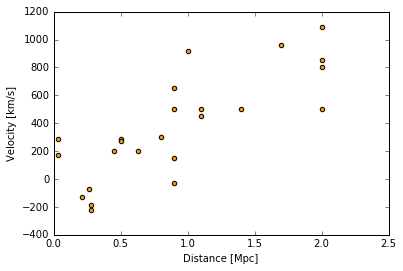

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['R'], data['V'], c='#ff9900', marker='o')
ax.set_xlim(xmin=0, xmax=2.5)
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity [km/s]')
fig.show()

[ 423.93732323]


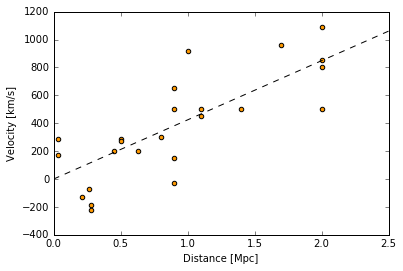

In [3]:
A = data['R'].reshape(N,1)
params, _, _, _ = np.linalg.lstsq(A, data['V'])
print params
H0 = params[0]

R = np.linspace(0,2.5,100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['R'], data['V'], c='#ff9900', marker='o')
ax.plot(R, H0*R, 'k--')
ax.set_xlim(xmin=0, xmax=2.5)
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity [km/s]')
fig.show()

[ 454.15844092  -40.7836491 ]


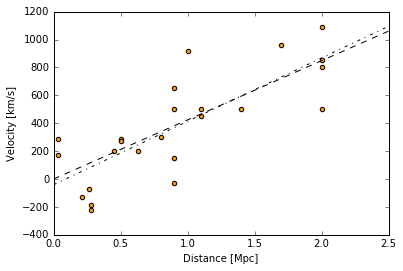

In [4]:
Ac = np.empty((N,2))
Ac[:,0] = data['R']
Ac[:,1] = 1
params_c, _, _, _ = np.linalg.lstsq(Ac, data['V'])
print params_c
H0_c = params_c[0]
intercept = params_c[1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['R'], data['V'], c='#ff9900', marker='o')
ax.plot(R, H0*R, 'k--')
ax.plot(R, intercept + H0_c*R, 'k-.')
ax.set_xlim(xmin=0, xmax=2.5)
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity [km/s]')
fig.show()

In [5]:
from coordinates import *
ra = Ra2Deg(data['RA'])
dec = Dec2Deg(data['DEC'])

Ah = np.empty((N,4))
Ah[:,0] = data['R']
Ah[:,1] = np.cos(ra*np.pi/180)*np.cos(dec*np.pi/180)
Ah[:,2] = np.sin(ra*np.pi/180)*np.cos(dec*np.pi/180)
Ah[:,3] = np.sin(dec*np.pi/180)
params_h, _, _, _ = np.linalg.lstsq(Ah, data['V'])
print params_h
H0 = params_h[0]

[ 465.76750923  -66.60857045  231.609005   -199.84401975]


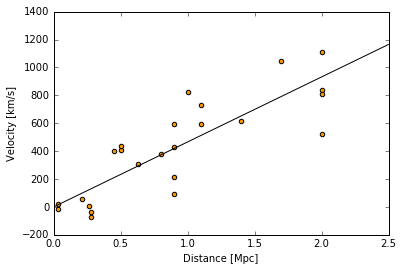

In [6]:
VS = params_h[1]*Ah[:,1] + params_h[2]*Ah[:,2] + params_h[3]*Ah[:,3]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['R'], data['V'] - VS, c='#ff9900', marker='o')
ax.plot(R, H0*R, 'k-')
ax.set_xlim(xmin=0, xmax=2.5)
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity [km/s]')
fig.show()

In [7]:
Mpc = 3.0857e19 # in km
Year = 60.*60.*24.*365 # in seconds
age = (H0 / Mpc * Year)**-1
age / 1e9 # in billion years

2.1007670819724287

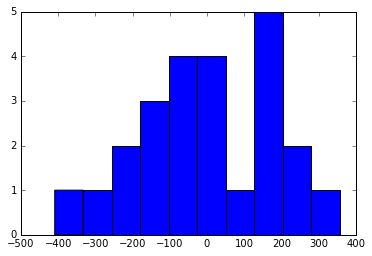

In [8]:
scatter = data['V'] - VS - H0*data['R']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(scatter, 10)
fig.show()

In [9]:
error = scatter.std()
Sigma = error**2*np.eye(N)
Ae = np.dot(Ah.T, np.dot(np.linalg.inv(Sigma), Ah))
be = np.dot(Ah.T, np.dot(np.linalg.inv(Sigma), data['V']))
params_e, _, _, _ = np.linalg.lstsq(Ae, be)
print params_e

[ 465.76750923  -66.60857045  231.609005   -199.84401975]


In [10]:
S = np.linalg.inv(Ae)
dH0 = np.sqrt(S[0,0])
print dH0

50.9205866109


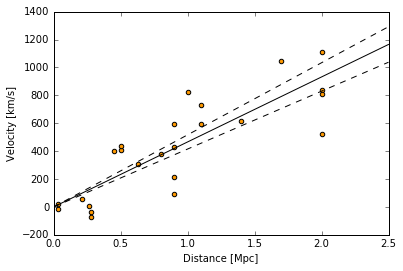

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['R'], data['V'] - VS, c='#ff9900', marker='o')
ax.plot(R, H0*R, 'k-')
ax.plot(R, (H0-dH0)*R, 'k--')
ax.plot(R, (H0+dH0)*R, 'k--')
ax.set_xlim(xmin=0, xmax=2.5)
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity [km/s]')
fig.show()

In [12]:
age = ((H0 - dH0)/ Mpc * Year)**-1
age / 1e9 # in billion years

2.3586267557802967

In [13]:
print np.dot(S, be)

[ 465.76750923  -66.60857045  231.609005   -199.84401975]
